<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Predicción del valor de una acción a un día</center></span>

**<center>Aplicaciones de Redes LSTM</center>**

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. [Introducción a Redes LSTM](Intro_LSTM.ipynb)
1. [Time Series Forecasting with LSTMs using TensorFlow 2 and Keras in Python](https://towardsdatascience.com/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python-6ceee9c6c651/)
1. [Dive into Deep Learnig](https://d2l.ai/)
1. [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
1. Ralf C. Staudemeyer and Eric Rothstein Morris,[*Understanding LSTM a tutorial into Long Short-Term Memory Recurrent Neural Networks*](https://arxiv.org/pdf/1909.09586.pdf), arxiv, September 2019
1. Karpathy, [*The Unreasonable Effectiveness of Recurrent Neural Networks*](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
1. Anton Lucanus, [Making Automation More Efficient by Learning from Historical Trade Data](https://datafloq.com/read/making-automation-more-efficient-by-learning-from-/7444), 8:43 AM, January 7, 2020
1. https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
1. https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1
1. https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653
1. https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md
1. [Python: How to Get Live Market Data (Less Than 0.1-Second Lag](https://towardsdatascience.com/python-how-to-get-live-market-data-less-than-0-1-second-lag-c85ee280ed93)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Importar las librería requeridas](#Importar-las-librería-requeridas)
* [Funciones-para-graficar-predicciones](#Funciones-para-graficar-predicciones)
* [Lectura de los datos](#Lectura-de-los-datos)
* [Extrae datos para la serie que se desea predecir-close](#Extrae-datos-para-la-serie-que-se-desea-predecir-close)
* [Visualización de la serie precio al cierre](#Visualización-de-la-serie-precio-al-cierre)
* [Preparación de los datos para el entrenamiento](#Preparación-de-los-datos-para-el-entrenamiento)
* [Crea el modelo LSTM](#Crea-el-modelo-LSTM)
* [Predicciones](#Predicciones)
* [Guarda el modelo entrenado](#Guarda-el-modelo-entrenado)
* [Intervalos de confianza. TO DO](#Intervalos-de-confianza.-TO-DO)

## <span style="color:blue">Importar las librería requeridas</span>

In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

from sklearn.preprocessing import MinMaxScaler

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


# importa objetos de keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional
print("Versión de Tensorflow: ", tf.__version__)

# optimizador
from tensorflow.keras.optimizers import Adam, Adamax

# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

Versión de Tensorflow:  2.9.2


## <span style="color:blue">Lectura de  los datos</span>

Estos datos corresponden a la empresa *Apple*. Son  3019 datos que corresponden a observaciones del precio de la acción, el número de transacciones de la acción (compra-venta). Los datos son diarios (dias hábiles o comerciales). Están entre el 3 de enero de 2006 hasta el 1 de enero de 2018.

la columna *Date* es la fecha, *Open* es el valor de acción a la apertura del mercado, *High* el valor más alto alcanzado en el día, *Low* el valor más bajo del día, *Close* el valor al cierre,  *Volume* es el volúmenes de acciones transadas en el día  y *Name* es el código de identificación de la empresa, Apple en este caso.


Los datos puede ser bajados directamente de [Kaggle](https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231)

In [2]:
#reading from a local file
data_raw = pd.read_csv('../Datos/AAPL_2006-01-01_to_2018-01-01.csv')

In [3]:
data_raw

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


Vamos a cambiar el índice de los datos. Tomaremos la fecha como indice: *df.index*. Los datos se reordenan para invertir la tabla, debido a que los datos contienen las observaciones más recientes en la parte superior de la tabla.

## <span style="color:blue">Extrae datos para la serie que se desea predecir-close</span>

In [4]:
#creating dataframe with date and the target variable
data_raw['Date'] = pd.to_datetime(data_raw.Date,format='%Y-%m-%d')
# Change index for datetime index
data_raw.index = data_raw['Date']
#Order if neccesary
data_raw.sort_index(ascending=True, inplace=True)
# Get only what you want
data = pd.DataFrame(data_raw[['Date', 'Close']])

#setting index
data.index = data.Date
# Drop Date
data.drop('Date', axis=1, inplace=True)
#Show Data
data.head()

,Close
Date,
2006-01-03,10.68
2006-01-04,10.71
2006-01-05,10.63
2006-01-06,10.90
2006-01-09,10.86


Desde aquí podríamos avanzar. El problema es que tenemos datos desactualizados.

Usemos alguna API para obtener datos en tiempo real.

## <span style="color:blue">Yahoo Finance API</span>

Como las acciones van cambiando de valor todos los días, será mejor utilizar una API que nos dé información actualizada de la bolsa.

Para esto, usaremos la API de Yahoo Finance de la bolsa de valores.

In [5]:
#!pip install yfinance
import yfinance as yf

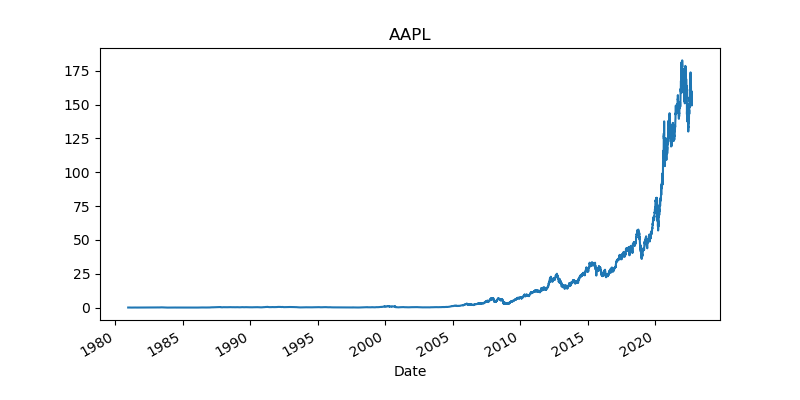

In [6]:
# Define Stock
stock = 'AAPL'

# Get data
data = yf.download(tickers=stock, period='max', interval='1d', progress=False)

#Print data
#display(data)

#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
data['Open'].plot(title=stock);

In [7]:
# looking at the first five rows of the data
print(f'\n Forma de los datos: {data.shape}\n')
data


 Forma de los datos: (10533, 6)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600
...,...,...,...,...,...,...
2022-09-15,154.649994,155.240005,151.380005,152.369995,152.369995,90481100
2022-09-16,151.210007,151.350006,148.369995,150.699997,150.699997,162157000
2022-09-19,149.309998,154.559998,149.100006,154.479996,154.479996,81474200


In [8]:
data_close = data[['Close']]
data_close.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


Note cómo la API ya devuelve la información de manera amena, pero no tiene por qué ser así.

## <span style="color:blue">Visualización de la serie precio al cierre</span>

In [9]:
# plot
len_data = len(data_close)
len_train = int(len_data*0.9) # 90%  = 9479 -> Depende de la fecha y acción elegida 
len_test = len_data - len_train # 10% = 1054 -> Depende de la fecha y acción elegida 
print (len_data, '=', len_train, '+',len_test)

10533 = 9479 + 1054


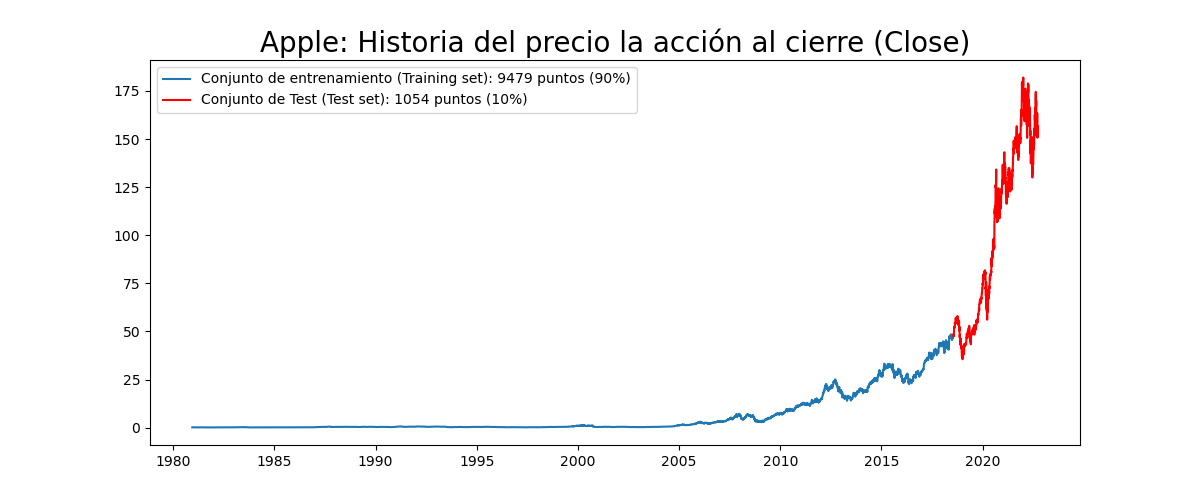

In [10]:
plt.figure(figsize=(12,5))
plt.plot(data_close[:len_train], label='Conjunto de entrenamiento (Training set): {} puntos (90%)'.format(len_train))
plt.plot(data_close['Close'][len_train:], label='Conjunto de Test (Test set): {} puntos (10%)'.format(len_test), color='r') 
plt.title("Apple: Historia del precio la acción al cierre (Close)", size = 20)
plt.legend()
plt.show()

## <span style="color:blue">Preparación de los datos para el entrenamiento de la red LSTM</span>

Para evitar problemas con las tendencias y para mejorar la estimación (entrenamiento) los datos se van a transformar a la escala $[0,1]$. Para las predicciones se utiliza la transformación inversa.

### Primero extrae los valores y se crea el  objeto MinMaxScaler

In [11]:
#creating train and test sets
dataset = data_close.values

# create the scaler object and scale the data
scaler = MinMaxScaler(feature_range=(0,1))
# Scaled data
dataset = np.squeeze(np.array(scaler.fit_transform(dataset)),axis=1)

In [12]:
# Check ok
print(dataset.shape)
# Check ok in scaler
print(f'\nMin: {dataset.min()}, Max: {dataset.max()}')

(10533,)

Min: 0.0, Max: 1.0


### Crea datos de entrenamiento 

 La red LSTM tendrá como entrada "**time_step**" datos consecutivos, y como salida **1 dato** (la predicción a
 partir de esos "time_step" datos se hace para el siguiente día). 
 
 Se conformará de esta forma el set de entrenamiento

1. Número de datos consecutivos para entrenamiento: time_step = 60. 
2. Días a predecir: days = 1

### Función para crear los datos entrenamiento

In [13]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    ''' dataset: conjunto de datos en forma de array
        start_index: índice inicial de donde empezar a tomar los datos
        end_index: índice final para tomar los datos. None para tomarlos todos
        history_size: tamaño de la ventana para crear las secuencias
        target_size: dentro de cuántas observaciones futuras desea pronosticar
    '''  
    data = []
    labels = []
    
    # Empezamos desfasados para tomar desde el incio de la serie
    start_index = start_index + history_size
    if end_index is None:
        # El último índice a tomar debe dejar espacio para el tamaño de la ventana
        end_index = len(dataset)

    for i in range(start_index, end_index-target_size+1):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        # Etiquetas (Datos a predecir)
        labels.append(dataset[i+target_size-1])

    return np.array(data), np.array(labels)

Se coloca una semilla para garantizar reproductibidad dentre de tensorflow

In [14]:
# Semilla
tf.random.set_seed(500)

In [15]:
# hiperparámetros para crear las secuencias
past_history = 60 # tamaño secuencias de entrada (Ventana de tiempo)
future_target = 1 # días adelante
TRAIN_SPLIT = len_train # nuḿero de datos entrenamiento

# secuencias de entrenamiento
X_train, y_train = univariate_data(dataset, start_index=0, 
                                            end_index=TRAIN_SPLIT,
                                            history_size=past_history,
                                            target_size=future_target)
#secuencias de test
# No se usará ningún dato que el modelo haya visto
X_test, y_test = univariate_data(dataset, TRAIN_SPLIT-past_history-future_target+1, None,
                                          past_history,
                                          future_target)

print(TRAIN_SPLIT)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

9479
(9419, 60, 1)
(9419,)
(1054, 60, 1)
(1054,)


In [16]:
# Visualize
train_df = pd.DataFrame(X_train[...,0], columns=[f'h_{i}' for i in range(past_history)])
pd.concat((train_df,pd.DataFrame(y_train, columns=['target'])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target
0,0.000435,0.000399,0.000350,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,...,0.000359,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261
1,0.000399,0.000350,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,...,0.000380,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282
2,0.000350,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,...,0.000383,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282,0.000276
3,0.000365,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,...,0.000374,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282,0.000276,0.000297
4,0.000383,0.000423,0.000457,0.000488,0.000527,0.000601,0.000613,0.000592,0.000567,0.000577,...,0.000368,0.000365,0.000359,0.000310,0.000282,0.000261,0.000282,0.000276,0.000297,0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,0.239795,0.241293,0.244618,0.244068,0.237144,0.227416,0.226757,0.223597,0.224572,0.225356,...,0.253122,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256
9415,0.241293,0.244618,0.244068,0.237144,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,...,0.252752,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863
9416,0.244618,0.244068,0.237144,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,...,0.254593,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190
9417,0.244068,0.237144,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,...,0.254057,0.256901,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603


In [17]:
print(dataset[:61].shape)
dataset[:61]

(61,)


array([0.00043548, 0.00039868, 0.00034961, 0.00036495, 0.00038335,
       0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214,
       0.00026068])

In [18]:
test_df = pd.DataFrame(X_test[...,0], columns=[f'h_{i}' for i in range(past_history)])
pd.concat((test_df,pd.DataFrame(y_test, columns=['target'])),axis=1)

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,h_51,h_52,h_53,h_54,h_55,h_56,h_57,h_58,h_59,target
0,0.227416,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,...,0.252422,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767
1,0.226757,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,...,0.254455,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325
2,0.223597,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,...,0.257986,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325,0.263358
3,0.224572,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,...,0.261572,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325,0.263358,0.262754
4,0.225356,0.222745,0.226784,0.232060,0.242323,0.242763,0.252298,0.254125,0.255348,0.257148,...,0.261256,0.257863,0.262190,0.262603,0.262026,0.262767,0.261325,0.263358,0.262754,0.262987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0.746429,0.743571,0.759619,0.778249,0.778249,0.755057,0.764895,0.751100,0.763246,0.777699,...,0.867829,0.856013,0.848979,0.856837,0.848594,0.864586,0.897890,0.845187,0.853265,0.837108
1050,0.743571,0.759619,0.778249,0.778249,0.755057,0.764895,0.751100,0.763246,0.777699,0.785174,...,0.856013,0.848979,0.856837,0.848594,0.864586,0.897890,0.845187,0.853265,0.837108,0.827930
1051,0.759619,0.778249,0.778249,0.755057,0.764895,0.751100,0.763246,0.777699,0.785174,0.804024,...,0.848979,0.856837,0.848594,0.864586,0.897890,0.845187,0.853265,0.837108,0.827930,0.848704
1052,0.778249,0.778249,0.755057,0.764895,0.751100,0.763246,0.777699,0.785174,0.804024,0.807816,...,0.856837,0.848594,0.864586,0.897890,0.845187,0.853265,0.837108,0.827930,0.848704,0.862003


In [19]:
print(dataset[-61:].shape)
dataset[-61:]

(61,)


array([0.7782491 , 0.75505729, 0.76489454, 0.75110039, 0.76324581,
       0.7776995 , 0.78517363, 0.80402388, 0.80781584, 0.79589021,
       0.80133097, 0.79929759, 0.81567471, 0.82501736, 0.80798078,
       0.82957879, 0.84078995, 0.85348506, 0.84656044, 0.84029536,
       0.83287624, 0.86139878, 0.86447643, 0.89283411, 0.88733843,
       0.8790949 , 0.91272855, 0.91096989, 0.90844193, 0.90580394,
       0.90607874, 0.92982014, 0.92569838, 0.94553781, 0.95152809,
       0.95064876, 0.95900223, 0.9568039 , 0.9423503 , 0.92064236,
       0.91877376, 0.92042248, 0.9341617 , 0.89893433, 0.88662404,
       0.87304969, 0.86376197, 0.86782881, 0.85601303, 0.84897856,
       0.85683743, 0.8485939 , 0.86458629, 0.89789013, 0.84518652,
       0.85326519, 0.83710785, 0.82793007, 0.84870376, 0.86200331,
       0.84452706])

## <span style="color:blue">Crea el modelo LSTM</span>

In [115]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units = 50

# layers
inputs = Input(input_shape)
x = Dropout(0.2, name= 'Dropout_01')(inputs)
x = LSTM(units=units, name='LSTM_layer')(x)
#x = LSTM(units=units, return_sequences=True,name='LSTM_layer')(inputs)
#x = Dropout(0.4)
#x = LSTM(units=units//2, name='LSTM_layer_2')(x)
#x = Dropout(0.4)
x = Dropout(0.2, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_01 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_01.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 LSTM_layer (LSTM)           (None, 50)                10400     
                                                                 
 Dropout_02 (Dropout)        (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


###  Callbacks

In [117]:
import os
os.makedirs(f'../Checkpoints/{future_target}_dia', exist_ok=True)

checkpoint_filepath = f'../Checkpoints/{future_target}_dia'
checkpoint_callback = ModelCheckpoint(
 filepath=checkpoint_filepath,
 save_weights_only=False,
 monitor="val_loss",
 mode="min",
 save_best_only=True)

early_stopping_callback = EarlyStopping(
 monitor="val_loss",
 min_delta=0.005,
 patience=20,
 mode="min",
 restore_best_weights=False
)

rlrop_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, mode='min', patience=5, min_lr=0.0001)

###  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [118]:
model_01.compile(loss='mean_squared_error', optimizer=Adam())

### Entrena el modelo


In [119]:
epochs=30

history = model_01.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    shuffle=True,
    callbacks=[early_stopping_callback, checkpoint_callback, rlrop_callback]
)

Epoch 1/30


2022-09-22 03:31:42.228971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:31:42.402668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:31:42.556231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


265/265 [==============================] - ETA: 0s - loss: 8.0324e-05

2022-09-22 03:31:48.576014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:31:48.648584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Checkpoints/1_dia/assets


INFO:tensorflow:Assets written to: ../Checkpoints/1_dia/assets


265/265 [==============================] - 13s 43ms/step - loss: 8.0324e-05 - val_loss: 3.8038e-05 - lr: 0.0010
Epoch 2/30
265/265 [==============================] - 6s 22ms/step - loss: 1.1363e-05 - val_loss: 1.6657e-04 - lr: 0.0010
Epoch 3/30
265/265 [==============================] - 6s 22ms/step - loss: 4.9584e-06 - val_loss: 9.5919e-05 - lr: 0.0010
Epoch 4/30
265/265 [==============================] - 6s 22ms/step - loss: 4.0872e-06 - val_loss: 1.1824e-04 - lr: 0.0010
Epoch 5/30
265/265 [==============================] - 6s 22ms/step - loss: 4.3980e-06 - val_loss: 2.3721e-04 - lr: 0.0010
Epoch 6/30
265/265 [==============================] - 6s 21ms/step - loss: 3.6751e-06 - val_loss: 8.0710e-05 - lr: 0.0010
Epoch 7/30
265/265 [==============================] - 6s 22ms/step - loss: 2.1899e-06 - val_loss: 1.5520e-04 - lr: 2.0000e-04
Epoch 8/30
265/265 [==============================] - 6s 24ms/step - loss: 2.0555e-06 - val_loss: 1.9853e-04 - lr: 2.0000e-04
Epoch 9/30
265/265 [======

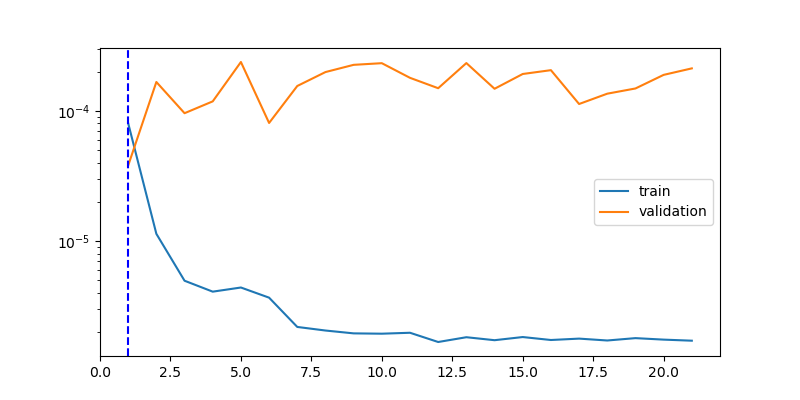

In [144]:
#Plot data
plt.close('all')
plt.figure(figsize=(8,4))
plt.semilogy(range(1, history.epoch[-1]+2),history.history['loss'], label='train')
plt.semilogy(range(1, history.epoch[-1]+2),history.history['val_loss'], label='validation')
plt.axvline(x = 1, linestyle='--', color = 'b')
plt.legend();

## <span style="color:blue">Predicciones</span>

### Prepara los datos de validación

In [121]:
X_test.shape

(1054, 60, 1)

### Calcula predicciones

In [122]:
model_01 = tf.keras.models.load_model(checkpoint_filepath)

In [143]:
model_01.history.params

{'verbose': 1, 'epochs': 1, 'steps': 33}

In [123]:
# predictions
prediction1 = model_01.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

 1/33 [..............................] - ETA: 12s

2022-09-22 03:34:22.781596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-22 03:34:22.846869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 1s 13ms/step


In [124]:
print(prediction1.shape)
print(y_test.shape)

(1054, 1)
(1054,)


### Elimina dimensiones sobrante para los gráficos

In [125]:
y_train_p1 = y_train #np.squeeze(y_train, axis=-1)
y_test_p1 = y_test #np.squeeze(y_test, axis=-1)
y_pred_p1 = np.squeeze(prediction1, axis=-1)

In [126]:
print(y_train_p1.shape)
print(y_test_p1.shape)
print(y_pred_p1.shape)

k=0
print('|-------test------|---pred--|----------dif---------|')
for i,j in zip(y_test_p1, y_pred_p1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

(9419,)
(1054,)
(1054,)
|-------test------|---pred--|----------dif---------|
0.2627674160750257 0.25993785 0.0028295634539471926
0.26132479416579846 0.26042247 0.0009023259803736527
0.26335821327939013 0.26082775 0.0025304633118150566
0.2627536844058564 0.26130116 0.0014525245471527781
0.2629872485680162 0.26173598 0.0012512728256761085
0.2648969988015629 0.26215425 0.00274274746451153
0.26739754623947415 0.2626432 0.004754358001330228
0.26655945320378066 0.2632573 0.0033021583105158903
0.2621216712296038 0.26384345 -0.001721775740382181
0.2606515859820381 0.26417783 -0.0035262430451378224


### Gráfica de las predicciones

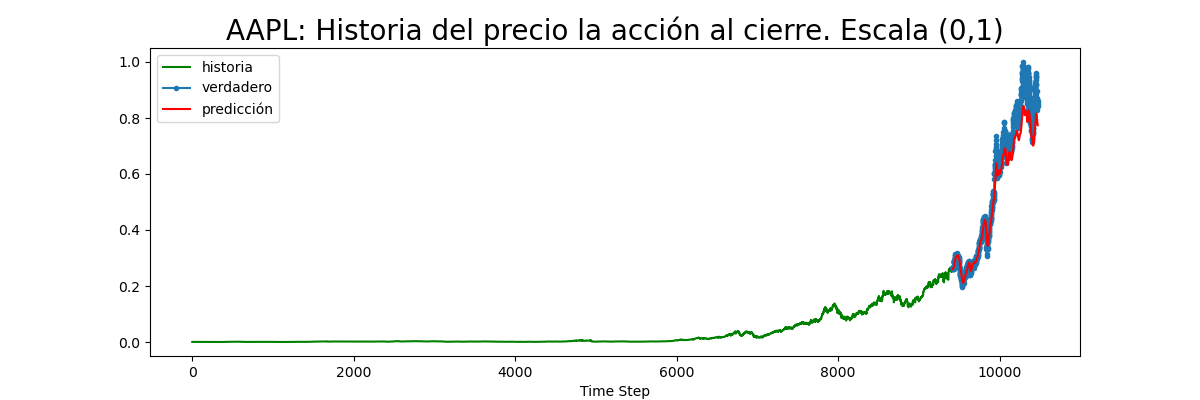

In [127]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_train_p1)), y_train_p1, 'g', label="historia")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_test_p1, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p1), len(y_train_p1) + len(y_test_p1)), y_pred_p1, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title(f"{stock}: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [128]:
y_pred_or1 = scaler.inverse_transform(y_pred_p1.reshape(-1,1))
y_test_or1 = scaler.inverse_transform(y_test_p1.reshape(-1,1))

In [129]:
k=0
for i,j in zip(y_test_or1, y_pred_or1):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

[47.86249924] [47.347633] [0.51486588]
[47.59999847] [47.435814] [0.16418457]
[47.97000122] [47.50956] [0.46044159]
[47.86000061] [47.5957] [0.2643013]
[47.90250015] [47.67482] [0.22768021]
[48.25] [47.75093] [0.49906921]
[48.70500183] [47.839897] [0.86510468]
[48.55250168] [47.95164] [0.6008606]
[47.74499893] [48.058296] [-0.31329727]
[47.47750092] [48.11914] [-0.64163971]


In [130]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or1-y_test_or1,2)))
print(rmsLSTM )

11.01165819652469


In [131]:
y_pred_or1.shape

(1054, 1)

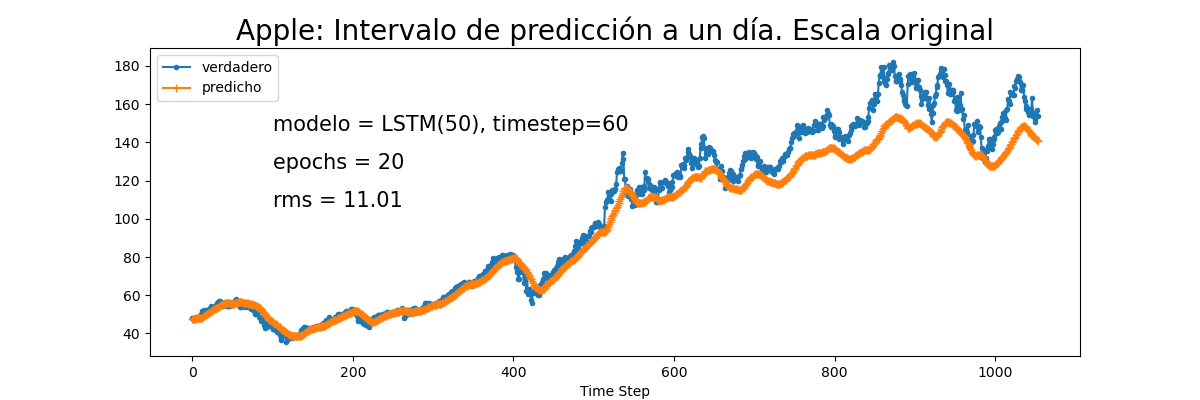

In [132]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(y_test_or1)), y_test_or1, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_pred_or1)), y_pred_or1, marker='+', label="predicho")
plt.xlabel('Time Step')

plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
plt.annotate(f"epochs = {history.epoch[-1]}" , xy=(100, 126), size = 15)
plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(100, 106), size = 15)
plt.title("Apple: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();

## <span style="color:blue">Guarda el modelo entrenado</span>

In [38]:
model_01.save(f'../Modelos/modelo_{stock}_{future_target}_dia.h5')

## <span style="color:blue">Intervalos de predicción. TO DO</span>

### Recupera la  configuración del modelo

In [39]:
print(model_01.get_config())

{'name': 'series_LSTM_model', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 60, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_1'}, 'name': 'input_1', 'inbound_nodes': []}, {'class_name': 'Dropout', 'config': {'name': 'Dropout_01', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}, 'name': 'Dropout_01', 'inbound_nodes': [[['input_1', 0, 0, {}]]]}, {'class_name': 'LSTM', 'config': {'name': 'LSTM_layer', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 50, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}, 'shared_object_id': 2}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'shared_object_id': 3}, 'bias_initializer': 

## <span style="color:blue">Predicción para Mañana</span>

In [40]:
from datetime import date
hoy = data_close.index[-past_history:][-1]
print("Hoy: ", hoy)

Hoy:  2022-09-21 00:00:00


In [41]:
mañana = data_close.index[-past_history:][-1]+pd.DateOffset(1)
print("Mañana: ", mañana) 

Mañana:  2022-09-22 00:00:00


In [42]:
ultima_ventana = dataset[-past_history:]

ultima_ventana_tensor = np.reshape(dataset[-past_history:], (1,past_history, 1))

# predictions
prediction1 = model_01.predict(ultima_ventana_tensor)

# Escalas originales
ultima_ventana_or = scaler.inverse_transform(ultima_ventana.reshape(-1,1))
prediction_or = scaler.inverse_transform(prediction1)[0]

1/1 [==============================] - 0s 154ms/step


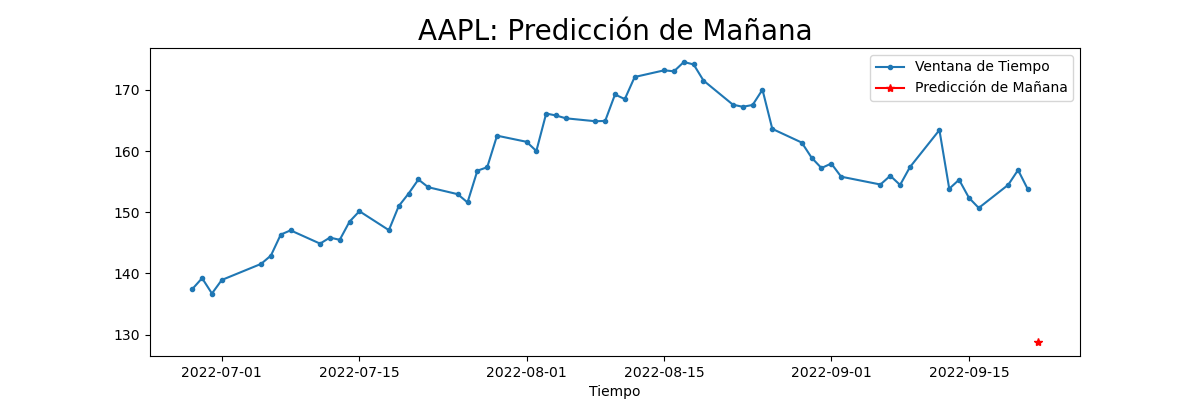

In [43]:
plt.close('all')
plt.figure(figsize=(12,4))
plt.plot(data_close.index[-past_history:], ultima_ventana_or, marker='.', label="Ventana de Tiempo")
plt.plot(mañana, prediction_or, marker='*', label="Predicción de Mañana", color='r')
plt.xlabel('Tiempo')

plt.title(f"{stock}: Predicción de Mañana", size = 20)
plt.legend()
plt.show();

In [44]:
prediction_or

array([128.79514], dtype=float32)

## <span style="color:blue">Crea el modelo LSTM bidirecional</span>

In [231]:
# shapes
input_shape = (X_train.shape[1], X_train.shape[2])
units_2 = 64
dropout = 0.2

# layers
inputs = Input(input_shape)
x = Dropout(dropout, name= 'Dropout_01')(inputs)
x = Bidirectional(LSTM(units, return_sequences=True,dropout=dropout,
    recurrent_dropout=dropout,))(x)
x = Bidirectional(LSTM(units//4, dropout=dropout,
    recurrent_dropout=dropout,))(x)
x = Dropout(dropout, name= 'Dropout_02')(x)
outputs = Dense(1)(x)

# model
model_02 = Model(inputs=inputs, outputs=outputs, name='series_LSTM_model')
model_02.summary()

Model: "series_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 Dropout_01 (Dropout)        (None, 60, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          20800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 24)               10848     
 nal)                                                            
                                                                 
 Dropout_02 (Dropout)        (None, 24)                0         
                                                                 
 dense_6 (Dense)             (None, 1)           

###  Compila

Se usará el optimizador Adam y la función de pérdida MSE

In [232]:
model_02.compile(loss='mean_squared_error',
  optimizer=Adam(0.001),metrics=["mae"])


In [233]:
tf.random.set_seed(500)

history = model_02.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/10


2022-09-21 21:23:25.162948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.plot(history.history['mae'][:], label='mae_train')
plt.plot(history.history['val_mae'][:], label='mae_loss')
plt.legend();

## <span style="color:blue">Predicciones</span>

### Prepara los datos de validación

In [ ]:
X_test.shape

### Calcula predicciones

In [ ]:
# predictions
prediction2 = model_02.predict(X_test)
#prediction = scaler.inverse_transform(prediction)

In [ ]:
print(prediction2.shape)
print(y_test.shape)


### Elimina dimensiones sobrante para los gráficos

In [ ]:
y_train_p2 = y_train #np.squeeze(y_train, axis=-1)
y_test_p2 = y_test#np.squeeze(y_test, axis=-1)
y_pred_p2 = np.squeeze(prediction2, axis=-1)

In [ ]:
print(y_train_p2.shape)
print(y_test_p2.shape)
print(y_pred_p2.shape)

k=0
for i,j in zip(y_test_p2, y_pred_p2):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

### Gráfica de las predicciones

In [ ]:
plt.plot(np.arange(0, len(y_train_p2)), y_train_p2, 'g', label="historia")
plt.plot(np.arange(len(y_train_p2), len(y_train_p2) + len(y_test_p2)), y_test_p2, marker='.', label="verdadero")
plt.plot(np.arange(len(y_train_p2), len(y_train_p2) + len(y_test_p2)), y_pred_p2, 'r', label="predicción")
#plt.ylabel('Valor')
plt.xlabel('Time Step')
plt.title("Apple: Historia del precio la acción al cierre. Escala (0,1)", size = 20)
plt.legend()
plt.show();

### Regreso a la escala original

In [ ]:
y_pred_or2 = scaler.inverse_transform(y_pred_p2.reshape(-1,1))
y_test_or2 = scaler.inverse_transform(y_test_p2.reshape(-1,1))

In [ ]:
k=0
for i,j in zip(y_test_or2, y_pred_or2):
    print (i,j, i-j)
    k+=1
    if k==10:
        break

In [ ]:
rmsLSTM = np.sqrt(np.mean(np.power(y_pred_or2-y_test_or2,2)))
print(rmsLSTM )

In [ ]:
plt.plot(np.arange(0, len(y_test_or)), y_test_or, marker='.', label="verdadero")
plt.plot(np.arange(0, len(y_test_or)), y_pred_or, marker='+', label="predicho")
plt.xlabel('Time Step')
plt.annotate("rms = "+str(round(rmsLSTM,2)) , xy=(100, 140), size = 15)
plt.annotate("modelo = LSTM(50), timestep=60" , xy=(100, 146), size = 15)
plt.annotate("epochs=40" , xy=(100, 143), size = 15)
plt.title("Apple: Intervalo de predicción a un día. Escala original", size = 20)
plt.legend()
plt.show();